# Занятие 5

###### 1) ДЗ_2
###### 2) GIL
###### 3) Numpy
###### 4)Примеры NP в ранних занятиях
###### 5) Когортный анализ


# ДЗ

In [84]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
FILEPATH = "DATA/athletes_sochi.txt"


In [85]:
df = pd.read_csv(FILEPATH).dropna()

df["BMI"] = df["weight"] / (df["height"]**2)
df["weight_square"] = df["weight"]**2
df["wh_mean_sub"] = (df["weight"]-df.weight.mean()) / (df["height"]-df.height.mean())

alldata = df[ ['weight', 'height', 'BMI', 'weight_square', 'wh_mean_sub', 'gender'] ]
alldata = alldata.sample(frac=1)

input = alldata[ ['weight', 'height', 'BMI', 'weight_square', 'wh_mean_sub'] ]
output = alldata["gender"].apply(lambda x: int(x == "Male"))

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(input, output, test_size=0.2)

model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)

model_classic = linear_model.LogisticRegression()
model_classic.fit(X_train[ ['weight', 'height', 'BMI'] ], Y_train)

Y_test_predicted = model.predict(X_test)
Y_test_predicted_classic = model_classic.predict(X_test[ ['weight', 'height', 'BMI'] ])

In [86]:
# с изменёнными параметрами
[tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
print(confusion_matrix(Y_test, Y_test_predicted))
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Accuracy [new]: ", (tn + tp) / (tp + fp + tn + fn))

# первоначальные параметры
[tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted_classic)
print(confusion_matrix(Y_test, Y_test_predicted_classic))
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Accuracy [classic]: ", (tn + tp) / (tp + fp + tn + fn))

[[164  28]
 [ 42 262]]
Accuracy [new]:  0.8588709677419355
[[162  30]
 [ 42 262]]
Accuracy [classic]:  0.8548387096774194


``В целом это не очень значимое улучшение accuracy, но это лучшее, что получилось выжать чисто из веса и роста. Оно иногда работает хуже исходного (в зависимости от того, как данные зашафлятся), но из 20 кейсов в 16 было лучше, а средний прирост accuracy 0,12% :)
``

In [ ]:
def print_accuracy(Y_test, Y_test_predicted, label = ""):
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    print(confusion_matrix(Y_test, Y_test_predicted))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tn + tp) / (tp + fp + tn + fn)
    print(f"Accuracy [{label}]: {accuracy}")
    return accuracy

def print_report(Y_test, Y_test_predicted, names):
    report = classification_report(Y_test, Y_test_predicted, target_names=names)
    print(report)

def predict(input, output, names, test_size = 0.2):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(input, output, test_size=test_size)
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    Y_test_predicted = model.predict(X_test)
    print_report(Y_test, Y_test_predicted, names)
#     print_accuracy(Y_test, Y_test_predicted)

In [ ]:
# вот это можно было бы и не выделять конечно, т.к. в целом наверно всё равно, делать это тут или в 
# глобальном скоупе
def prepare_data():
    df = pd.read_csv("../datasets/athletes_sochi.txt").dropna()
    df["BMI"] = df["weight"] / (df["height"]**2)
    df["weight_square"] = df["weight"]**2
    df["wh_mean_sub"] = (df["weight"]-df.weight.mean()) / (df["height"]-df.height.mean())
    alldata = df[ ['weight', 'height', 'BMI', 'weight_square', 'wh_mean_sub', 'gender'] ]
    alldata = alldata.sample(frac=1)
    input = alldata[ ['weight', 'height', 'BMI', 'weight_square', 'wh_mean_sub'] ]
    output = alldata["gender"].apply(lambda x: int(x == "Male"))
    return input, output



In [ ]:
input, output = prepare_data()
predict(input, output, ['Male', 'Female'])

`У меня датасет с медицинскими показателями и наличием/отсутствием у пациента хронической болезни почек. Наверно, он больше подходит для задачи классификации, но я нашёл работу (https://www.kaggle.com/mahmoudlimam/chronic-kidney-disease-clustering-and-prediction), в которой была достигнута очень хорошая точность классификации с использованием кластеризации (k-means), поэтому меня заинтересовал вариант тоже попытаться решить эту задачу с помощью кластеризации, но с использованием другого метода. Плюс в этом датасете много пропущенных значений, что влечёт за собой интересный препроцессинг.`

In [ ]:
У меня датасет с медицинскими показателями и наличием/отсутствием у пациента хронической болезни почек. Наверно, он больше подходит для задачи классификации, но я нашёл работу (https://www.kaggle.com/mahmoudlimam/chronic-kidney-disease-clustering-and-prediction), в которой была достигнута очень хорошая точность классификации с использованием кластеризации (k-means), поэтому меня заинтересовал вариант тоже попытаться решить эту задачу с помощью кластеризации, но с использованием другого метода. Плюс в этом датасете много пропущенных значений, что влечёт за собой интересный препроцессинг.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# df = pd.read_csv("../datasets/kidney_disease.csv").dropna()
FILEPATH = "../datasets/kidney_disease.csv"
df = pd.read_csv(FILEPATH)
df.head()

In [ ]:
 исправление опечаток/удаление лишних вайтспейсов
def fix_typos(df): 
    for i in range(df.shape[0]):
        if df.iloc[i,25]=='ckd\t':
            df.iloc[i,25]='ckd'
        if df.iloc[i,20] in [' yes','\tyes']:
            df.iloc[i,20]='yes'
        if df.iloc[i,20]=='\tno':
            df.iloc[i,20]='no'
        if df.iloc[i,21]=='\tno':
            df.iloc[i,21]='no'
        if df.iloc[i,16]=='\t?':
            df.iloc[i,16]=np.nan
        if df.iloc[i,16]=='\t43':
            df.iloc[i,16]='43'
        if df.iloc[i,17]=='\t?':
            df.iloc[i,17]=np.nan
        if df.iloc[i,17]=='\t6200':
            df.iloc[i,17]= '6200'
        if df.iloc[i,17]=='\t8400':
            df.iloc[i,17]= '6200'
        if df.iloc[i,18]=='\t?':
            df.iloc[i,18]=np.nan
        if df.iloc[i,25]=='ckd':
            df.iloc[i,25]='yes'
        if df.iloc[i,25]=='notckd':
            df.iloc[i,25]='no'

# исправление типов данных, которые были прочитаны как строки
def fix_data_types(df):
    mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
    numeric=[]
    for i in df.columns:
        if df[i].dtype=='float64':
            numeric.append(i)
    numeric=numeric+mistyped
    for col in mistyped:
        df[col]=df[col].astype('float')

# препроцессинг качественных значений в датасете
def preprocess_categoricals(df):
    numeric=[]
    for i in df.columns:
        if df[i].dtype=='float64':
            numeric.append(i)
    categoricals=[]
    for col in df.columns:
        if not col in numeric:
            categoricals.append(col)
    categoricals.remove('Chronic Kidney Disease')

    df_new=pd.get_dummies(df,drop_first=True,prefix_sep=': ')

    # возвращение затёртых nan
    for name in df.columns:
        for ohname in df_new.columns:
            if name+': ' in ohname and name in categoricals:
                for i in range(400):
                    if type(df.loc[i,name]) != str:
                        if math.isnan(df.loc[i,name]):
                            df_new.loc[i,ohname]=df.loc[i,name]
    return df_new

# заполнение пропущенных значений с помощью knn
def knn_fill_na(df,transformer=QuantileTransformer(output_distribution='normal'),weights='distance',n_neighbors=8):
    data_array = transformer.fit_transform(df)
    df_transformed = pd.DataFrame(data_array,columns=df.columns)

    categorical_feats = df.columns[14:]
    numerical_feats = df.columns[:14]

    knn = KNNImputer(weights=weights, n_neighbors=n_neighbors)
    knn_fit = knn.fit_transform(df_transformed)
    knn_reversed = transformer.inverse_transform(knn_fit)

    return pd.DataFrame(knn_reversed,columns=df.columns)
            
def preprocess(df):
    fix_typos(df)
    df.drop('id',axis=1,inplace=True)
    feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
    df.columns=feature_names
    fix_data_types(df)
    df = preprocess_categoricals(df)
    df = knn_fill_na(df)
    return df

In [ ]:
def plot_res(Y, cluster_labels):
    sns.heatmap(pd.crosstab(Y,cluster_labels),
                cmap='Blues',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':20},
                fmt='d')

    plt.title("Results",fontsize=25)
    plt.ylabel("Chronic Kidney Disease",fontsize=10)
    plt.xlabel("Clusters",fontsize=10)
    plt.show()
    
def agglomerative_clustering(data, n_clusters=2, affinity='euclidean', linkage='ward'):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    cluster.fit_predict(data)
    return cluster

In [ ]:
df = pd.read_csv(FILEPATH)
df = preprocess(df)

X = df.drop("Chronic Kidney Disease: yes",axis=1,inplace=False)
Y = df["Chronic Kidney Disease: yes"]

SS = StandardScaler()
scaled_data = SS.fit_transform(X)

cluster = agglomerative_clustering(scaled_data, n_clusters=2)
plot_res(Y, cluster.labels_)

In [ ]:
/home/lev/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "

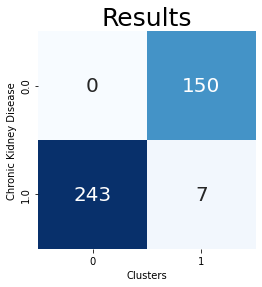

`Точность 98.25% (если корректно так говорить о кластеризации в фактической задаче класификации)
Далее в рамках дз по математике я планирую сделать из этого классификатор, т.е. с полученными кластерами после иерархической кластеризации навесить сверху knn, чтобы классифицировать новые случаи
Также нужно самому исследовать, возможно другой transformer или количество соседей в knn (в препроцессинге) для иерархической кластеризации подойдут лучше, т.к. текущие значения были взяты из исследования, где применялся k-means. Также стоит рассмотреть возможность количества кластеров > 2, потому что в вышеупомянутом исследовании по итогу наибольшая точность была достигнута при 6 кластерах (только 1 из которых содержал больных людей)`

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import numpy as np
import math
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import datetime as dt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

path = (r'C:\Users\Aleksey\Python_study\ДЗ Python\season2\athletes_sochi.txt')
dfs = pd.read_csv(FILEPATH).dropna()
alldata = dfs[['birthdate', 'weight', 'height', 'gender']]

def get_data(features, predicted):
    now = pd.Timestamp('now')
    new_gender = {"gender": {"Male" : 1, "Female" : 0}}
    newdata = dfs.replace(new_gender)
    now = pd.Timestamp('now')
    newdata['birthdate'] = pd.to_datetime(dfs['birthdate'], format='%Y-%m-%d')
    newdata['birthdate'] = newdata['birthdate'].where(newdata['birthdate'] < now, newdata['birthdate'] -  np.timedelta64(100, 'Y'))
    newdata['age'] = (now - newdata['birthdate']).astype('<m8[Y]')
    newdata["BMI"] = newdata["weight"] / (newdata["height"]**2)
    newdata = newdata.sample(frac=1)
    global allinput, alloutput
    allinput = newdata[features]
    alloutput = newdata[predicted]
    print(allinput, alloutput)

def train_and_test_model_linear():
    global X_train, X_test, Y_train, Y_test
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(allinput, alloutput, test_size=0.05)
#     scaler = MinMaxScaler(feature_range = (0,1))
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
    global model
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    global Y_test_predicted
    Y_test_predicted = model.predict(X_test)

def get_sex(myW, myH, myA):
    myBMI=myW/(myH**2)
    mysex=model.predict_proba([[myW, myH, myA, myBMI]])
    print('\n', mysex)

def precision_and_recall():
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    confusion_matrix(Y_test, Y_test_predicted)
    precision = tp / (tp + fp)
    recall = tp / tp + fn

    print('\n', "Precision: ", tp / (tp + fp))
    print("Recall: ", tp / (tp + fn))
    print("Accuracy: ", (tn + tp) / (tp + fp + tn + fn))
    print("F1: ",  (precision * recall) / ((precision) + recall))
    report = classification_report(Y_test, model.predict(X_test), target_names=['Male', 'Female'])
    print(report)

get_data(features = ['weight', 'height', 'age', 'BMI'], predicted = 'gender')
train_and_test_model_linear()
# get_sex(myW = 70, myH = 1.82, myA = 23)
precision_and_recall()
#Accuracy увеличивается за счет добавления BMI и возраста в модель, однако тогда в модели появляется мультиколлинеарность.
#Также accuracy увеличивается в зависимости от test_size датасет

      weight  height   age        BMI
2578    80.0    1.76  38.0  25.826446
1479    70.0    1.71  33.0  23.938990
141     62.0    1.68  41.0  21.967120
363     66.0    1.74  36.0  21.799445
1836    91.0    1.84  39.0  26.878544
...      ...     ...   ...        ...
2653    66.0    1.70  37.0  22.837370
2272    64.0    1.80  34.0  19.753086
1533    60.0    1.64  27.0  22.308150
2052    89.0    1.87  27.0  25.451114
1819    65.0    1.82  31.0  19.623234

[2479 rows x 4 columns] 2578    1
1479    0
141     1
363     0
1836    1
       ..
2653    1
2272    0
1533    0
2052    1
1819    1
Name: gender, Length: 2479, dtype: int64

 Precision:  0.8939393939393939
Recall:  0.8309859154929577
Accuracy:  0.8467741935483871
F1:  0.836423118865867
              precision    recall  f1-score   support

        Male       0.79      0.87      0.83        53
      Female       0.89      0.83      0.86        71

    accuracy                           0.85       124
   macro avg       0.84      0.85   

In [89]:
import pandas as pd
import glob
import os
import tqdm
import gc
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import math
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from tqdm import tqdm

%matplotlib inline


def find_params(df, features, desired_value):
    '''
    input: 1) DataFrame, 2) Table columns, 3) Search column
    return: 1) Precision, 2) Recall, 3) Accuracy, 4) F1
    '''
    all_feat = features.copy()
    all_feat.append(desired_value)
    r_dfs = df[all_feat]
    r_dfs = r_dfs.sample(frac=1)
    df_input = r_dfs[features]
    df_output = r_dfs[desired_value].apply(lambda x: int(x == r_dfs[desired_value].iloc[0]))
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_input, df_output, test_size=0.2)
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    model.coef_
    Y_test_predicted = model.predict(X_test)
    Y_test_predicted
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    confusion_matrix(Y_test, Y_test_predicted)
    return [tp/(tp+fp), tp/(tp+fn), (tn+tp)/(tp+fp+tn+fn), ((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))]


dfs = pd.read_csv(FILEPATH).dropna()
dfs["BMI"] = dfs["weight"] / (dfs["height"] ** 2)
params = find_params(dfs, ['age', 'height', 'weight', 'BMI'], 'gender')
print(f'Precision: {params[0]}\nRecall: {params[1]}\nAccuracy: {params[2]}\nF1: {params[3]}')

Precision: 0.887459807073955
Recall: 0.8846153846153846
Accuracy: 0.8568548387096774
F1: 0.44301765650080255


`А теперь при помощи созданной функции поищем лучшие комбинации фичей для повышения "Accuracy"`



In [95]:
params = find_params(dfs, ['height', 'weight', 'BMI'], 'gender')
print(f'Accuracy: {params[2]}')

Accuracy: 0.8629032258064516


In [94]:
params = find_params(dfs, ['age', 'height', 'weight', 'BMI'], 'gender')
print(f'Accuracy: {params[2]}')

Accuracy: 0.8588709677419355


In [92]:
params = find_params(dfs, ['age', 'height', 'weight'], 'gender')
print(f'Accuracy: {params[2]}')

Accuracy: 0.8467741935483871


In [91]:
params = find_params(dfs, ['height', 'weight'], 'gender')
print(f'Accuracy: {params[2]}')

Accuracy: 0.8548387096774194


In [96]:
params = find_params(dfs, ['height', 'weight', 'BMI', 'gold_medals', 'silver_medals', 'bronze_medals', 'total_medals'], 'gender')
print(f'Accuracy: {params[2]}')

Accuracy: 0.8669354838709677


/mnt/c/ds/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import glob
import os
import gc
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import classification_report

def get_data_frame(path):
    f = os.path.join(str(path))
    dfs = pd.read_csv(f).dropna() # Загрузка с удалением пустых строк и столбцов
    dfs["BMI"] = dfs["weight"] / (dfs["height"]**2)
    return dfs[['weight', 'height', 'BMI', 'gender']].sample(frac=1)
    
def training_logistic_regression_model(all_input_data, all_output, test_size):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(all_input_data, all_output, test_size = test_size)
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    return model, X_test, Y_test

def get_my_sex(model, myW, myH, myBMI):
    mysex=model.predict([[myW, myH, myBMI]])
    return ("Female" if mysex[0] == 0 else "Male")
    
def show_data_model_info(model, X_test, Y_test):
    Y_test_predicted = model.predict(X_test)
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    print(confusion_matrix(Y_test, Y_test_predicted))
    precision = tp / (tp + fp)
    recall = tp / tp + fn
    report = classification_report(Y_test, model.predict(X_test), target_names=['Male', 'Female'])
    print(report)
    return precision, recall
    

path_data = "../DataForTrainingTasks/athletes_sochi.txt"
gender = "Male"
myH=1.65 # Рост
myW=75 # Вес 
myBMI=myW/(myH**2) # Индекс BMI
test_size = 0.25

alldata = get_data_frame(path_data)
print(alldata)

allinput = alldata[ ['weight', 'height', 'BMI'] ]
alloutput = alldata["gender"].apply(lambda x: int(x == gender))

print(allinput)
print(alloutput)

model, X_test, Y_test = training_logistic_regression_model(allinput, alloutput, test_size)

print(get_my_sex(model, myH, myW, myBMI))
print(show_data_model_info(model, X_test, Y_test))

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [ ]:
def logReg(df, X, Y):
    
    #выделяем данные для регрессии
    alldata = df[X + Y]
    #смешиваем
    alldata = alldata.sample(frac=1)
    
    #определеяем параметры входа и выхода
    allinput = alldata[X]
    alloutput = alldata[Y]
    
    #делим выборку на тестовую и обучающую
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(allinput, alloutput, test_size=0.2)
    
    #строим модель
    model = linear_model.LogisticRegression()
    #обучаем модель
    model.fit(X_train, Y_train.values.ravel())
    
    #рассчитываем долю правильных ответов
    accuracy = model.score(X_test, Y_test)
    
    #print(accuracy)
    
    return accuracy

#модель предсказывает значения для тестовых данных
    #Y_test_predicted = model.predict(X_test)

In [ ]:
def mean_accuracy(df, X, Y):
    a = np.array([])
    for i in range(100):
        a = np.append(a, logReg(df, X, Y))
    print(a.mean())

In [ ]:
def show_scatter(x, y, xLabel, yLabel):
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.scatter(x, y)
    plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), "r--")
    plt.show()

In [ ]:
def get_data():
    global country_df
    country_df = pd.read_csv("я удалил путь, так как в нем были ПнД")
    dataset = country_df.drop(['country'], axis=1)
    columns = dataset.columns
    scaler = MinMaxScaler()
    rescaled_dataset_minmax = scaler.fit_transform(dataset)
    df_minmax = pd.DataFrame(data=rescaled_dataset_minmax, columns=columns)
    return df_minmax

# Зачем нужен Python Global Interpreter Lock и как mон работает


Python Global Interpreter Lock (GIL) — это своеобразная блокировка, позволяющая только одному потоку управлять интерпретатором Python. Это означает, что в любой момент времени будет выполняться только один конкретный поток.

Работа GIL может казаться несущественной для разработчиков, создающих однопоточные программы. Но во многопоточных программах отсутствие GIL может негативно сказываться на производительности процессоро-зависымых программ.

Поскольку GIL позволяет работать только одному потоку даже в многопоточном приложении, он заработал репутацию «печально известной» функции.

Что за проблему в Python решает GIL?


Python подсчитывает количество ссылок для корректного управления памятью. Это означает, что созданные в Python объекты имеют переменную подсчёта ссылок, в которой хранится количество всех ссылок на этот объект. Как только эта переменная становится равной нулю, память, выделенная под этот объект, освобождается.

Вот небольшой пример кода, демонстрирующий работу переменных подсчёта ссылок:

In [275]:
 import sys
 a = []
 b = a
 sys.getrefcount(a)

3

В этом примере количество ссылок на пустой массив равно 3. На этот массив ссылаются: переменная a, переменная b и аргумент, переданный функции sys.getrefcount().



Проблема, которую решает GIL, связана с тем, что в многопоточном приложении сразу несколько потоков могут увеличивать или уменьшать значения этого счётчика ссылок. Это может привести к тому, что память очистится неправильно и удалится тот объект, на который ещё существует ссылка.



Счётчик ссылок можно защитить, добавив блокираторы на все структуры данных, которые распространяются по нескольким потокам. В таком случае счётчик будет изменяться исключительно последовательно.



Но добавление блокировки к нескольким объектам может привести к появлению другой проблемы — взаимоблокировки (англ. deadlocks), которая получается только если блокировка есть более чем на одном объекте. К тому же эта проблема тоже снижала бы производительность из-за многократной установки блокираторов.



GIL — эта одиночный блокиратор самого интерпретатора Python. Он добавляет правило: любое выполнение байткода в Python требует блокировки интерпретатора. В таком случае можно исключить взаимоблокировку, т. к. GIL будет единственной блокировкой в приложении. К тому же его влияние на производительность процессора совсем не критично. Однако стоит помнить, что GIL уверенно делает любую программу однопоточной.



Несмотря на то, что GIL используется и в других интерпретаторах, например в Ruby, он не является единственным решением этой проблемы. Некоторые языки решают проблему потокобезопасного освобождения памяти с помощью сборки мусора.



С другой стороны это означает, что такие языки часто должны компенсировать потерю однопоточных преимуществ GIL добавлением каких-то дополнительных функций повышения производительности, например JIT-компиляторов.



Итак, почему же это не очень «хорошее» решение используется в Python? Насколько для разработчиков это решение критично?



Python существует с тех времён, когда в операционных системах не существовало понятия о потоках. Этот язык разрабатывался в расчёте на лёгкое использование и ускорение процесса разработки. Всё больше и больше разработчиков переходило на Python.



Много расширений, в которых нуждался Python, было написано для уже существующих библиотек на C. Для предотвращения несогласованных изменений, язык C требовал потокобезопасного управления памятью, которое смог предоставить GIL.



GIL можно было легко реализовать и интегрировать в Python. Он увеличивал производительность однопоточных приложений, поскольку управление велось только одним блокиратором.



Те библиотеки на C, которые не были потокобезопасными, стало легче интегрировать. Эти расширения на C стали одной из причин, почему Python-сообщество стало расширяться.



Как можно понять, GIL — фактическое решение проблемы, с которой столкнулись разработчики CPython в начале жизни Python.



Если смотреть на типичную программу (не обязательно написанную на Python) — есть разница, ограничена ли эта программа производительностью процессора или же I/O.



Операции, ограниченные производительностью процессора (англ. CPU-bound) — это все вычислительные операции: перемножение матриц, поиск, обработка изображений и т. д.



Операции, ограниченные производительностью I/O (англ. I/O-bound) — это те операции, которые часто находятся в ожидании чего-либо от источников ввода/вывода (пользователь, файл, БД, сеть). Такие программы и операции иногда могут ждать долгое время, пока не получат от источника то, что им нужно. Это связано с тем, что источник может проводить собственные (внутренние) операции, прежде чем он будет готов выдать результат. Например, пользователь может думать над тем, что именно ввести в поисковую строку или же какой запрос отправить в БД.



Ниже приведена простая CPU-bound программа, которая попросту ведёт обратный отсчёт:



In [276]:
import time
from threading import Thread

COUNT = 50000000

def countdown(n):
    while n > 0:
        n -= 1

start = time.time()
countdown(COUNT)
end = time.time()
print('Затраченное время -', end - start)

Затраченное время - 2.2898433208465576


Запустив это на 4х-ядерном компьютере получим такой результат:



In [277]:
print('Затраченное время -', end - start)

Затраченное время - 2.2898433208465576


Ниже приведена та же программа, с небольшим изменением. Теперь обратный отсчёт ведётся в двух параллельных потоках:



In [278]:
COUNT = 50000000

def countdown(n):
    while n > 0:
        n -= 1

t1 = Thread(target=countdown, args=(COUNT//2,))
t2 = Thread(target=countdown, args=(COUNT//2,))

start = time.time()
t1.start()
t2.start()
t1.join()
t2.join()
end = time.time()

In [279]:
print('Затраченное время -', end - start)


Затраченное время - 2.2828524112701416


Как видно из результатов, оба варианта затратили примерно одинаковое время. В многопоточной версии GIL предотвратил параллельное выполнение потоков.



GIL не сильно влияет на производительность I/O-операций в многопоточных программах, т. к. в процессе ожидания от I/O блокировка распространяется по потокам.



Однако программа, потоки которой будут работать исключительно с процессором (например обработка изображения по частям), из-за блокировки не только станет однопоточной, но и на её выполнение будет затрачиваться больше времени, чем если бы она изначально была строго однопоточной.



Такое увеличение времени — это результат появления и реализации блокировки.



Почему GIL всё ещё используют?


Разработчики языка получили уйму жалоб касательно GIL. Но такой популярный язык как Python не может провести такое радикальное изменение, как удаление GIL, ведь это, естественно, повлечёт за собой кучу проблем несовместимости.

В прошлом разработчиками были предприняты попытки удаления GIL. Но все эти попытки разрушались существующими расширениями на C, которые плотно зависели от существующих GIL-решений. Естественно, есть и другие варианты, схожие с GIL. Однако они либо снижают производительность однопоточных и многопоточных I/O-приложений, либо попросту сложны в реализации. Вам бы не хотелось, чтобы в новых версиях ваша программа работала медленней, чем сейчас, ведь так?



Почему GIL не был удалён в Python 3?


Python 3 на самом деле имел возможность переделки некоторых функций с нуля, хотя из-за этого многие расширения на С попросту сломались бы и их пришлось бы переделывать. Именно из-за этого первые версии Python 3 так слабо расходились по сообществу.



Но почему бы параллельно с обновлением Python 3 не удалить GIL?



Его удаление сделает однопоточность в Python 3 медленней по сравнению с Python 2 и просто представьте, во что это выльется. Нельзя не заметить преимущества однопоточности в GIL. Именно поэтому он всё ещё не удалён.



Но в Python 3 действительно появились улучшения для существующего GIL. До этого момента в статье рассказывалось о влиянии GIL на многопоточные программы, которые затрагивают только процессор или только I/O. А что насчёт тех программ, у которых часть потоков идут на процессор, а часть на I/O?



В таких программах I/O-потоки «страдают» из-за того, что у них нет доступа к GIL от процессорных потоков. Это связано со встроенным в Python механизмом, который принуждал потоки освобождать GIL после определённого интервала непрерывного использования. В случае, если никто другой не используют GIL, эти потоки могли продолжать работу.



Но тут есть одна проблема. Почти всегда GIL занимается процессорными потоками и остальные потоки не успевают занять место.



Как справиться GIL?


Если GIL у вас вызывает проблемы, вот несколько решений, которые вы можете попробовать:



Многопроцессность против многопоточности. Довольно популярное решение, поскольку у каждого Python-процесса есть собственный интерпретатор с выделенной под него памятью, поэтому с GIL проблем не будет. В Python уже есть модуль multiprocessing, который упрощает создание процессов к такому виду:



In [282]:
from multiprocessing import Pool
import time

COUNT = 50000000
def countdown(n):
    while n > 0:
        n -= 1


pool = Pool(processes=2)
start = time.time()
r1 = pool.apply_async(countdown, [COUNT//2])
r2 = pool.apply_async(countdown, [COUNT//2])
pool.close()
pool.join()
end = time.time()
print('Затраченное время в секундах -', end - start)

Затраченное время в секундах - 1.1502611637115479


http://python-3.ru/page/multiprocessing

Альтернативные интерпретаторы Python. У Python есть много разных реализаций интерпретаторов. CPython, Jyton, IronPython и PyPy, написанные на C, Java, C# и Python соответственно. GIL существует только на оригинальном интерпретаторе — на CPython.

Вы просто можете использовать преимущества однопоточности, в то время, пока одни из самых ярких умов прямо сейчас работают над устранением GIL из CPython.

https://habr.com/ru/post/84629/

https://ru.wikipedia.org/wiki/%D0%93%D0%BB%D0%BE%D0%B1%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D1%80%D0%B5%D1%82%D0%B0%D1%82%D0%BE%D1%80%D0%B0

# Введение в Numpy и Scipy

Это два основных пакета для всяких численных и научных расчётов с использованием питона. Большинство из входящих в эти пакеты функции работают супер-оптимизировано или вообще представляют из себя код на C (или фортране), к которому написаны биндинги. Внутри jupyter notebook можно включать «научный режим» специальной магической командой %pylab inline, тогда многие компоненты будут подргужены в среду и, в том числе, картинки будут отображаться прямо в коде.



In [4]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [99]:
print("Три массива с по-разному заданным типом\n",
    array([2, 4, 6, 1, 7]), "\n",
    array([7, 6, 8, 12], np.float64), "\n",
    array([7, 6, 8, 12], np.int64)
)

Три массива с по-разному заданным типом
 [2 4 6 1 7] 
 [ 7.  6.  8. 12.] 
 [ 7  6  8 12]


Такие массивы это, условно, вектора. Аргументом после перечисления можно подсказывать тип данных в массиве. Иногда такое указывание типов важно.



Если мы хотим создать матрицу, то это по сути массив массивов:



In [100]:
array([[-1, 0], [2, 4]], np.int64)


array([[-1,  0],
       [ 2,  4]])

In [101]:
print(zeros(10))
print("--")
print(zeros([3, 4], np.int64))
print("--")
print(ones([4, 2]))
print("--")
print(zeros([2, 4]))
print("--")
print(identity(4))
print("--")
print(diag([4, 7, 2, 5]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
--
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
--
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
--
[[4 0 0 0]
 [0 7 0 0]
 [0 0 2 0]
 [0 0 0 5]]


По аналогии с range, в numpy есть arange, с помощью которого можно задавать массив данных как арифметическую прогрессию. Можно создавать numpy-массивы с помощью метода arange, это такой же метод, как и range, только у вас сразу получается np.array. Ну и его аргументы могут быть нецелыми.



In [102]:
np.arange(4.2, 15.6, 2.1)  # от 4.2 до 15.6 с шагом 2.1


array([ 4.2,  6.3,  8.4, 10.5, 12.6, 14.7])

In [103]:
linspace(4.2, 15.6, 5)  # 5 элементов от 4.2 до 15.6 эквидистантно


array([ 4.2 ,  7.05,  9.9 , 12.75, 15.6 ])

In [104]:
# 10 элементов от 0.01 до 10000 равномерно на логарифмической шкале
logspace(-2, 3, 10)

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])

Операции над массивами можно делать "оптом"



In [105]:
x = linspace(-pi, 3*pi/2)
y = sin(x)
y

array([-1.22464680e-16, -1.59599895e-01, -3.15108218e-01, -4.62538290e-01,
       -5.98110530e-01, -7.18349350e-01, -8.20172255e-01, -9.00968868e-01,
       -9.58667853e-01, -9.91790014e-01, -9.99486216e-01, -9.81559157e-01,
       -9.38468422e-01, -8.71318704e-01, -7.81831482e-01, -6.72300890e-01,
       -5.45534901e-01, -4.04783343e-01, -2.53654584e-01, -9.60230259e-02,
        6.40702200e-02,  2.22520934e-01,  3.75267005e-01,  5.18392568e-01,
        6.48228395e-01,  7.61445958e-01,  8.55142763e-01,  9.26916757e-01,
        9.74927912e-01,  9.97945393e-01,  9.95379113e-01,  9.67294863e-01,
        9.14412623e-01,  8.38088105e-01,  7.40277997e-01,  6.23489802e-01,
        4.90717552e-01,  3.45365054e-01,  1.91158629e-01,  3.20515776e-02,
       -1.27877162e-01, -2.84527587e-01, -4.33883739e-01, -5.72116660e-01,
       -6.95682551e-01, -8.01413622e-01, -8.86599306e-01, -9.49055747e-01,
       -9.87181783e-01, -1.00000000e+00])

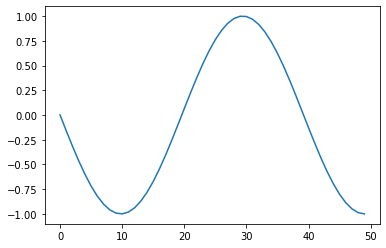

In [106]:
plot(y)


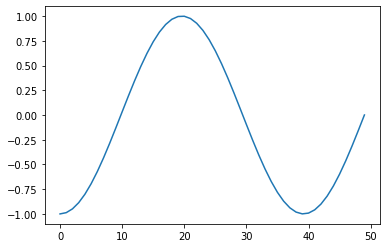

In [107]:
plot(cos(x))  # не обязательно создавать отдельную переменную


Если plot указать две переменные, он поймёт это как пары координат



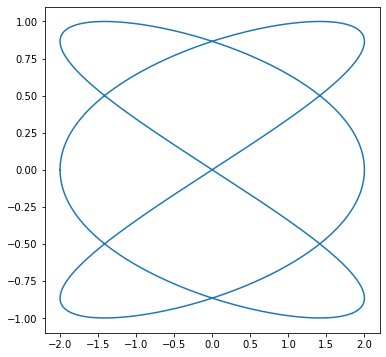

In [108]:
figsize(6, 6)
x = linspace(-pi, pi, 1000)
plot(2*cos(x*3), sin(x*2))

Есть дополнительные операции с матрицами и векторами, например транспонирование или "переколбашивание"



In [109]:
a = arange(49)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [110]:
a.reshape(7, 7)


array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48]])

In [111]:
a.reshape(7, 7).T


array([[ 0,  7, 14, 21, 28, 35, 42],
       [ 1,  8, 15, 22, 29, 36, 43],
       [ 2,  9, 16, 23, 30, 37, 44],
       [ 3, 10, 17, 24, 31, 38, 45],
       [ 4, 11, 18, 25, 32, 39, 46],
       [ 5, 12, 19, 26, 33, 40, 47],
       [ 6, 13, 20, 27, 34, 41, 48]])

Точно так же как обычные списки и таплы, эти массивы поддерживают индексацию и слайсы



In [112]:
a = arange(36)
print(a[7:15])
print(a[::-2])  # каждый второй в обратном порядке

[ 7  8  9 10 11 12 13 14]
[35 33 31 29 27 25 23 21 19 17 15 13 11  9  7  5  3  1]


Однако, так как мы имеем дело с матрицами, нам доступно ещё одно измерение



In [113]:
a = arange(121).reshape(11, 11)
a

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21],
       [ 22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32],
       [ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43],
       [ 44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54],
       [ 55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65],
       [ 66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76],
       [ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87],
       [ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98],
       [ 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]])

In [115]:
print("---\n", a[0, :])
print("---\n", a[:, 2])
print("---\n", a[3:7, 5:8])

---
 [ 0  1  2  3  4  5  6  7  8  9 10]
---
 [  2  13  24  35  46  57  68  79  90 101 112]
---
 [[38 39 40]
 [49 50 51]
 [60 61 62]
 [71 72 73]]


Ну и да, конечно, двумя измерениями не кончается всё и можно делать полноценные многомерные тензоры



In [116]:
t = arange(27).reshape(3, 3, 3)
print("---\n", t)
print("---\n", t[1, 2, 2])
print("---\n", t[1, :, :])

---
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
---
 17
---
 [[ 9 10 11]
 [12 13 14]
 [15 16 17]]


Когда мы имеем дело с этими объектами, у нас ещё открывается вся их plethora методов, которыми можно над ними измываться



In [117]:
a = array([np.random.randint(20, 50) for i in range(15)])
print(a)
print(f"""Значения получились от {a.min()} до {a.max()}.
Среднее {a.mean():.3f} +/- {a.std():.3f}. Сумма = {a.sum()}""")

[41 29 26 37 30 41 41 39 27 24 31 43 39 46 20]
Значения получились от 20 до 46.
Среднее 34.267 +/- 7.698. Сумма = 514


In [118]:
b = array([np.random.randint(23, 42) for _ in range(25)]).reshape(5, 5)
print("Матрица:")
print(b)
print("Она же, транспонированная")
print(b.T)
print(f"""---\nСлед = {b.trace()}. Минимальное значение {b.min()}.
Минимальные значения в столбиках {b.min(axis=0)}
Максимальное значения в строчках {b.max(axis=1)}""")

Матрица:
[[26 30 35 39 33]
 [39 39 37 39 25]
 [30 23 28 41 23]
 [33 32 41 26 38]
 [37 33 26 37 23]]
Она же, транспонированная
[[26 39 30 33 37]
 [30 39 23 32 33]
 [35 37 28 41 26]
 [39 39 41 26 37]
 [33 25 23 38 23]]
---
След = 142. Минимальное значение 23.
Минимальные значения в столбиках [26 23 26 26 23]
Максимальное значения в строчках [39 39 41 41 37]


In [119]:
a = array([np.random.randint(2, 5) for _ in range(3)])
b = array([np.random.randint(2, 5) for _ in range(3)])
print(a, b)
print(np.dot(a, b))
print(a.dot(b))
print(a*b)
print(a + b)
print(a / b)

[2 3 3] [4 3 2]
23
23
[8 9 6]
[6 6 5]
[0.5 1.  1.5]


Ну и да, с помощью scipy можно ещё решать уравнения и находить собственные значения матриц (и собственные вектора тоже)



In [120]:
A = array([[5, 6, 3], [1, 0, -1], [1, 2, -1]])
b = array([8, -9, 65])
solve(A, b)

array([-30.125,  37.   , -21.125])

In [122]:
A = array([[12, 4], [2, -1]])
print(A)
print("Собственные значения: ", eigvals(A))
print("Собственные вектора и собственные вектора:\n",
      "\n".join(str(v) for v in eig(A)))

[[12  4]
 [ 2 -1]]
Собственные значения:  [12.58872344 -1.58872344]
Собственные вектора и собственные вектора:
 [12.58872344 -1.58872344]
[[ 0.98934175 -0.28238181]
 [ 0.14561217  0.9593021 ]]


Есть ещё булевая индексация, она работает типа как наложение маски на исходный массив



In [123]:
names = np.array(
  ["Василиса", "Маша", "Антон", "Даша", "Саша", "Женя", "Женя", "Даша"]
)
names == "Маша"

array([False,  True, False, False, False, False, False, False])

In [124]:
mask = ~(names == "Василиса") | (names == "Женя")
names[mask]

array(['Маша', 'Антон', 'Даша', 'Саша', 'Женя', 'Женя', 'Даша'],
      dtype='<U8')

In [125]:
data = np.random.randn(7, 4)
data

array([[-1.0888794 , -0.70416961, -0.35060093,  1.05473095],
       [-1.09961446,  0.57996326,  1.31529881, -0.02927696],
       [ 0.14395656,  0.05305783, -0.44896471,  1.39304527],
       [-0.62051324, -1.40488987, -0.56876618,  2.04401913],
       [ 2.01708549, -0.8340462 , -2.37338665, -0.32344696],
       [-0.49891198, -1.43666735,  1.33302513, -0.63416366],
       [ 0.34469363,  0.2086503 ,  0.62144699,  0.98848058]])

In [126]:
data[data < 0]


array([-1.0888794 , -0.70416961, -0.35060093, -1.09961446, -0.02927696,
       -0.44896471, -0.62051324, -1.40488987, -0.56876618, -0.8340462 ,
       -2.37338665, -0.32344696, -0.49891198, -1.43666735, -0.63416366])

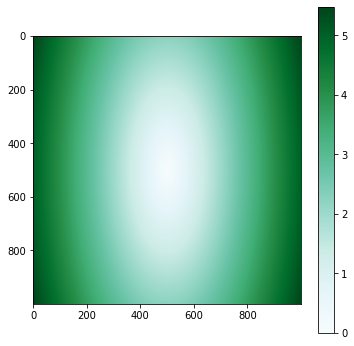

In [127]:
points = np.arange(-5, 5, 0.01)
xx, yy = np.meshgrid(points, points)
z = np.sqrt(xx**2 + yy**2/5)
plt.imshow(z, cmap=plt.cm.BuGn); plt.colorbar();

Классическая задачка про #pi

In [128]:
np.random.seed(7500)


In [129]:
np.random.rand(10) 

array([0.23332451, 0.10112317, 0.9509881 , 0.94529661, 0.01885737,
       0.03101   , 0.2919819 , 0.38705245, 0.95448108, 0.95686945])

In [133]:
N = 3000
xx = 2*np.random.rand(N) - 1
yy = 2*np.random.rand(N) - 1
rr = xx**2 + yy**2

попало = (rr < 1).sum()
print( попало / N * 4)

3.1


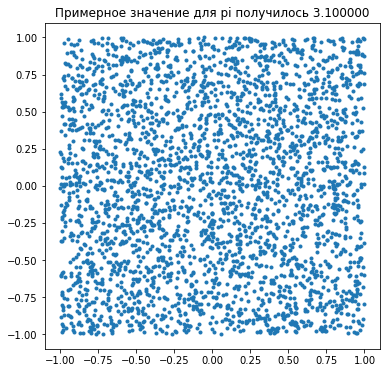

In [134]:
figsize(6, 6)
title("Примерное значение для pi получилось %f" % (попало/N*4))
plot(xx, yy, '.')

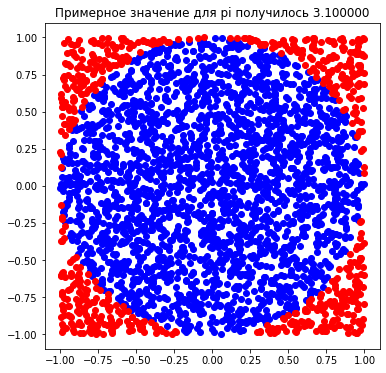

In [135]:
figsize(6, 6)
title("Примерное значение для pi получилось %f" % (попало/N*4))
plot(xx[rr < 1], yy[rr < 1], 'bo')
plot(xx[rr > 1], yy[rr > 1], 'ro')

В numpy помимо стандартного распределения есть и другие.



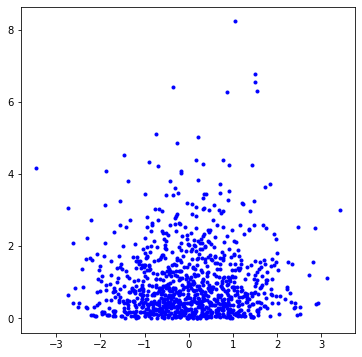

In [136]:
xx = np.random.normal(size=1000)
yy = np.random.exponential(size=1000)
plot(xx, yy, 'b.')

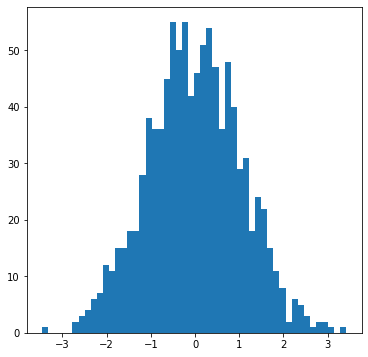

In [137]:
hist(xx, bins=50);


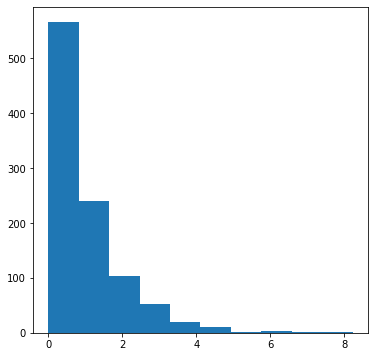

In [138]:
hist(yy);


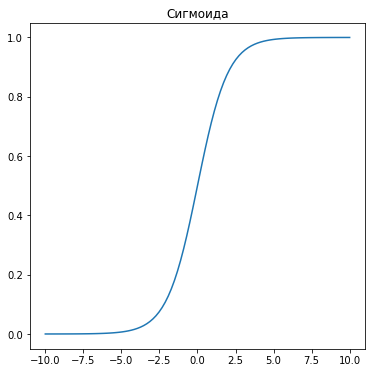

In [139]:
def f(x):
    return 1 / (1 + np.exp(-x))

x = linspace(-10, 10, 100)
title("Сигмоида")
plot(x, f(x));

In [140]:
from scipy.integrate import quad
quad(f, 0, 5)

(4.313568167929173, 8.426550522221871e-13)

###### Давайте еще раз пробежимся по этой "прекрасной" библиотеке

https://sites.engineering.ucsb.edu/~shell/che210d/numpy.pdf

NumPy это open-source модуль для python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций. Они объединяются в высокоуровневые пакеты. Они обеспечивают функционал, который можно сравнить с функционалом MatLab. NumPy (Numeric Python) предоставляет базовые методы для манипуляции с большими массивами и матрицами. SciPy (Scientific Python) расширяет функционал numpy огромной коллекцией полезных алгоритмов, таких как минимизация, преобразование Фурье, регрессия, и другие прикладные математические техники.


Сообщество NumPy и SciPy поддерживает онлайн руководство, включающие гайды и туториалы, тут: docs.scipy.org/doc.


Импорт модуля numpy


In [ ]:
import numpy

In [ ]:
import numpy as np

Также можно импортировать numpy прямо в используемое пространство имен, чтобы вообще не использовать функции через точку, а вызывать их напрямую:

In [ ]:
from numpy import *

Однако, этот вариант не приветствуется в программировании на python, так как убирает некоторые полезные структуры, которые модуль предоставляет.

###### Массивы

Главной особенностью numpy является объект array. Массивы схожи со списками в python, исключая тот факт, что элементы массива должны иметь одинаковый тип данных, как float и int. С массивами можно проводить числовые операции с большим объемом информации в разы быстрее и, главное, намного эффективнее чем со списками.


Создание массива из списка:


In [141]:
a = np.array([1, 4, 5, 8], float)
a


array([1., 4., 5., 8.])

In [98]:
type(a)


numpy.ndarray

Здесь функция array принимает два аргумента: список для конвертации в массив и тип для каждого элемента. Ко всем элементам можно получить доступ и манипулировать ими так же, как вы бы это делали с обычными списками:


In [142]:
a[:2]



array([1., 4.])

In [143]:
a[3]


8.0

In [144]:
a[0] = 5.
a

array([5., 4., 5., 8.])

Массивы могут быть и многомерными. В отличии от списков можно использовать запятые в скобках. Вот пример двумерного массива (матрица):


In [145]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [147]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [148]:
a[0,0]

1.0

In [149]:
a[0,1]

2.0

Array slicing работает с многомерными массивами аналогично, как и с одномерными, применяя каждый срез, как фильтр для установленного измерения. Используйте ":" в измерении для указывания использования всех элементов этого измерения:


In [18]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [150]:
a[1,:]

array([4., 5., 6.])

In [151]:
a[:,2]

array([3., 6.])

In [21]:
a[-1:, -2:]

array([[5., 6.]])

Метод shape возвращает количество строк и столбцов в матрице:


In [152]:
a.shape

(2, 3)

Метод dtype возвращает тип переменных, хранящихся в массиве:


In [153]:
a.dtype

dtype('float64')

Тут float64, это числовой тип данных в numpy, который используется для хранения вещественных чисел двойной точности. Так же как float в Python.


Метод len возвращает длину первого измерения (оси):


In [154]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [155]:
len(a)

2

Метод in используется для проверки на наличие элемента в массиве:


In [156]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [157]:
2 in a

True

In [158]:
 0 in a

False

Массивы можно переформировать при помощи метода, который задает новый многомерный массив. Следуя следующему примеру, мы переформатируем одномерный массив из десяти элементов во двумерный массив, состоящий из пяти строк и двух столбцов:


In [159]:
a = np.array(range(10), float)

In [160]:
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [161]:
a = a.reshape((5, 2))

In [162]:
a

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]])

In [163]:
a.shape

(5, 2)

Обратите внимание, метод reshape создает новый массив, а не модифицирует оригинальный.


Имейте ввиду, связывание имен в python работает и с массивами. Метод copy используется для создания копии существующего массива в памяти:


In [168]:
a = np.array([1, 2, 3], float)

In [169]:
b = a

In [170]:
c =  a.copy()

In [174]:
a[0] = 0

In [175]:
a

array([0., 2., 3.])

In [176]:
b

array([0., 2., 3.])

In [177]:
c

array([1., 2., 3.])

Списки можно тоже создавать с массивов:


In [178]:
a = np.array([1, 2, 3], float)

In [179]:
a

array([1., 2., 3.])

In [180]:
a.tolist()

[1.0, 2.0, 3.0]

Можно также переконвертировать массив в бинарную строку (то есть, не human-readable форму). Используйте метод tostring для этого. Метод fromstring работает в для обратного преобразования. Эти операции иногда полезны для сохранения большого количества данных в файлах, которые могут быть считаны в будущем.


In [181]:
a = array([1, 2, 3], float)

In [182]:
s = a.tostring()

<ipython-input-182-8796a9390679>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  s = a.tostring()


In [183]:
s

b'\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x08@'

In [184]:
np.fromstring(s)

<ipython-input-184-6c2008ed54c7>:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring(s)


array([1., 2., 3.])

Заполнение массива одинаковым значением.

In [185]:
a = array([1, 2, 3], float)

In [188]:
a

array([0., 0., 0.])

In [187]:
a.fill(0)

Транспонирование массивов также возможно, при этом создается новый массив:


In [189]:
a = np.array(range(6), float).reshape((2, 3))

In [190]:
a

array([[0., 1., 2.],
       [3., 4., 5.]])

In [191]:
a.transpose()

array([[0., 3.],
       [1., 4.],
       [2., 5.]])

Многомерный массив можно переконвертировать в одномерный при помощи метода flatten:


In [192]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [193]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [194]:
a.flatten()

array([1., 2., 3., 4., 5., 6.])

Два или больше массивов можно сконкатенировать при помощи метода concatenate:


In [195]:
a = np.array([1,2], float)

In [196]:
b = np.array([3,4,5,6], float)

In [197]:
c = np.array([7,8,9], float)

In [198]:
np.concatenate((a, b, c))

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

Если массив не одномерный, можно задать ось, по которой будет происходить соединение. По умолчанию (не задавая значения оси), соединение будет происходить по первому измерению:


In [199]:
a = np.array([[1, 2], [3, 4]], float)

In [200]:
b = np.array([[5, 6], [7,8]], float)

In [201]:
np.concatenate((a,b))

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [202]:
np.concatenate((a,b), axis=0)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [203]:
np.concatenate((a,b), axis=1)

array([[1., 2., 5., 6.],
       [3., 4., 7., 8.]])

Другие пути создания массивов


In [204]:
np.arange(5, dtype=float)

array([0., 1., 2., 3., 4.])

In [205]:
np.arange(1, 6, 2, dtype=int)

array([1, 3, 5])

Функции zeros и ones создают новые массивы с установленной размерностью, заполненные этими значениями. Это, наверное, самые простые в использовании функции для создания массивов:


In [206]:
 np.ones((2,3), dtype=float)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [207]:
np.zeros(7, dtype=int)

array([0, 0, 0, 0, 0, 0, 0])

Когда для массивов мы используем стандартные математические операции, должен соблюдаться принцип: элемент--элемент. Это означает, что массивы должны быть одинакового размера во время сложения, вычитания и тому подобных операций:


In [208]:
a = np.array([1,2,3], float)
b = np.array([5,2,6], float)

In [209]:
a

array([1., 2., 3.])

In [210]:
b

array([5., 2., 6.])

In [211]:
a + b

array([6., 4., 9.])

In [214]:
a - b

array([-4.,  0., -3.])

In [215]:
b**a

array([  5.,   4., 216.])

Для двухмерных массивов, умножение остается поэлементным и не соответствует умножению матриц. Для этого существуют специальные функции, которые мы изучим позже.


In [216]:
a = np.array([[1,2], [3,4]], float)
b = np.array([[2,0], [1,3]], float)

In [217]:
a * b

array([[ 2.,  0.],
       [ 3., 12.]])

При несоответствии в размере выбрасываются ошибки:


In [218]:
a = np.array([1,2,3], float)
b = np.array([4,5], float)

In [219]:
a + b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Однако, если размерность массивов не совпадает, они будут преобразованы для выполнения математических операций. Это зачастую означает, что меньший массив будет использован несколько раз для завершения операций. Рассмотрим такой пример:


In [220]:
a = np.array([[1, 2], [3, 4], [5, 6]], float)
b = np.array([-1, 3], float)

In [221]:
a

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [222]:
b

array([-1.,  3.])

In [223]:
a + b

array([[0., 5.],
       [2., 7.],
       [4., 9.]])

Вдобавок к стандартным операторам, в numpy включена библиотека стандартных математических функций, которые могут быть применены поэлементно к массивам. Собственно функции: abs, sign, sqrt, log, log10, exp, sin, cos, tan, arcsin, arccos, arctan, sinh, cosh, tanh, arcsinh, arccosh, и arctanh.


In [224]:
a = np.array([1, 4, 9], float)

In [225]:
np.sqrt(a)

array([1., 2., 3.])

Функции floor, ceil и rint возвращают нижние, верхние или ближайшие (округлённое) значение:


In [228]:
a = np.array([1.1, 1.5, 1.9], float)
np.rint(a)

array([1., 2., 2.])

Также в numpy включены две важные математические константы:


In [229]:
np.pi


3.141592653589793

In [230]:
np.e

2.718281828459045

Важная часть каждой симуляции это способность генерировать случайные числа. Для этого мы используем встроенный в NumPy генератор псевдослучайных чисел в под-модуле random. Числа являются псевдо случайными, в том плане что, они сгенерированы детерминистически из порождающего элемента (seed number), но рассредоточены в статистическом сходстве с случайным образом. Для генерации NumPy использует особенный алгоритм который имеет название Mersenne Twister.
Задать порождающий элемент последовательности случайных чисел можно так:

In [ ]:
np.random.seed(293423)

Seed это целое число. Каждая программа которая запускается с одинаковым seed`ом будет генерировать одинаковую последовательность чисел каждый раз. Это может быть полезно для отладки, но вообще нам не нужно задавать seed, на самом деле, когда мы запускаем программу несколько раз, мы хотим получать каждый раз разную последовательность чисел. Если эта команда не будет выполнена, то NumPy автоматически выбирает случайный seed (базирующийся на времени), который является разным при каждом запуске программы.
Массив случайных чисел из полуинтервала [0.0, 1.0) может быть сгенерирован так:

In [231]:
np.random.rand(5)

array([0.50684669, 0.43083975, 0.94073979, 0.9420917 , 0.90348493])

Функция rand может быть использована для генерации двумерных массивов, или можно использовать функцию reshape:

In [232]:
np.random.rand(2,3)

array([[0.96409217, 0.04051913, 0.99402223],
       [0.91604319, 0.0878476 , 0.19602711]])

In [233]:
np.random.rand(6).reshape((2,3))

array([[0.87108233, 0.84230209, 0.04299811],
       [0.4936422 , 0.15733543, 0.96868511]])

###### Модули SciPy


In [234]:
import scipy

In [235]:
help(scipy)

Help on package scipy:

NAME
    scipy

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at https://docs.scipy.org.
    
    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import. For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     li

 некоторым под-модулям нужен непосредственно дополнительный импорт, которые помечены звездой:

In [ ]:
import scipy.interpolate

Функции в каждом модуле хорошо задокументированы во внутренних docstring`ах и в официальной документации. Большинство из них непосредственно предоставляет функции для работы с числовыми алгоритмами и они очень просты в использовании. Таким образом, SciPy может сохранять гигантское количество времени в научных вычислениях, т.к. он обеспечивает уже написанные и тестированные функции.


# Примеры NP в ранних занятиях

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [238]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [239]:
y = np.choose(y, [1, 2, 0]).astype(float)


In [240]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

---

Метод random.seed() задает начальные условия для генератора случайных чисел.

Генератор инициализированный одними и теми же начальными условиями, выдает абсолютно идентичные случайные последовательности.

In [241]:
np.random.seed(1)


In [242]:
np.random.rand(3)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04])

---

In [243]:
from sklearn import preprocessing
iris= datasets.load_iris()
X = iris.data
Y = iris.target

In [244]:
onehot_encoder=preprocessing.OneHotEncoder(sparse=False)
reshaped=Y.reshape(len(Y), 1)
y_onehot=onehot_encoder.fit_transform(reshaped)

In [245]:
Y[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [246]:
reshaped[1:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [247]:
print(y_onehot[1:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


---

In [ ]:
import pandas as pd

In [250]:
dates = pd.date_range('20210303',periods=60)
df = pd.DataFrame(np.random.randn(60,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2021-03-03,0.133165,1.897899,-2.345071,-0.034013
2021-03-04,1.069731,0.315054,0.745087,-0.482107
2021-03-05,0.031586,-2.676468,-0.923388,0.878783
2021-03-06,0.223879,0.467144,-1.448372,0.758864
2021-03-07,-1.069260,0.862543,0.213488,-1.231046
2021-03-08,-0.065506,1.849322,1.554514,-0.207218
2021-03-09,2.103762,-0.066616,-0.349601,-0.246336
2021-03-10,0.652335,-1.631183,-1.141654,-0.423025
2021-03-11,-1.689661,-0.676198,-0.038984,-0.167307
2021-03-12,-1.792248,0.732054,-1.440336,0.329540


In [ ]:
np.random.randn(6,4)

In [253]:
dates = pd.date_range('20210303',periods=900)

In [254]:
dates

DatetimeIndex(['2021-03-03', '2021-03-04', '2021-03-05', '2021-03-06',
               '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10',
               '2021-03-11', '2021-03-12',
               ...
               '2023-08-10', '2023-08-11', '2023-08-12', '2023-08-13',
               '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17',
               '2023-08-18', '2023-08-19'],
              dtype='datetime64[ns]', length=900, freq='D')

# Когортный анализ

 позволяет сделать вывод о направлении развития продукта.
Само по себе построение когорт, при наличии времени, не так уж и сложно. В развивающемся продукте строить когорты следует для оценки каждого изменения.

Когорта — это группа людей, имеющих что-то общее, например дату регистрации в приложении, месяц первой покупки, географическое положение, канал приобретения (обычные пользователи, пришедшие из маркетинга производительности и т. д.) и т. д. .ВКогортный анализ, мы отслеживаем эти группы пользователей с течением времени, чтобы определить некоторые общие модели или поведение.
При проведении когортного анализа важно учитывать взаимосвязь между отслеживаемой метрикой и бизнес-моделью. В зависимости от целей компании мы можем сосредоточиться на удержании пользователей, коэффициенте конверсии (подписке на платную версию сервиса), полученном доходе и т. д.

расмотрим когортый анализ удержания пользователей

Удержание клиентов имеет решающее значение для любого бизнеса, поскольку гораздо дешевле удержать существующих клиентов (с помощью инструментов CRM, скидок для участников и т. д.), чем приобретать новых.


Кроме того, когортный анализ также может помочь проследить влияние изменений продукта на поведение пользователей, будь то изменения в дизайне или совершенно новые функции. Наблюдая за тем, как группы ведут себя с течением времени, мы можем более или менее определить, повлияли ли наши усилия на пользователей.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

Набор данных можно кратко описать следующим образом: «Это транснациональный набор данных, который содержит все транзакции, имевшие место в период с 12.01.2010 по 12.09.2011 для базирующейся в Великобритании и зарегистрированной немагазинной онлайн-розничной торговли. В основном компания занимается продажей уникальных подарков на все случаи жизни. Многие клиенты компании — оптовики».

In [256]:
df = pd.read_excel('DATA/Online Retail.xlsx',
                   dtype={'CustomerID': str,
                          'InvoiceID': str},
                   parse_dates=['InvoiceDate'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [258]:
df.isnull().values.any()

True

In [259]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [260]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

нам нужно иметь идентификаторы клиентов, мы отбросим все строки без них.

In [261]:
df.dropna(subset=['CustomerID'], inplace=True)


Для полноты картины мы также проводим очень быструю EDA, уделяя особое внимание пользователям. EDA всегда является очень важным этапом любого анализа, поскольку мы обнаруживаем специфику набора данных, с которым работаем.
Начнем с проверки распределения числовых переменных — количества и цены за единицу.

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0


Из таблицы выше видно, что есть заказы с отрицательным количеством — скорее всего возвраты. Всего около 9 тысяч покупок с отрицательным количеством. Мы удаляем их из набора данных. Это вносит своего рода погрешность, поскольку мы включаем первоначальные заказы и удаляем возврат — таким образом учитывается первоначальный заказ, хотя теоретически он не был реализован и не принес дохода. Однако для простоты мы оставляем первоначальный заказ, так как для такой метрики, как удержание (указывающее на вовлеченность клиентов), это все еще должно быть допустимым предположением.


Затем мы рассчитываем совокупный показатель, показывающий, сколько заказов было размещено каждым клиентом.

In [262]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.97% of customers ordered more than once.


Используя приведенный выше код, мы можем утверждать, что 65,57% клиентов заказывали более одного раза. Это уже ценная информация, так как кажется, что клиенты размещают несколько заказов. Это означает, что будет хоть какое-то удержание. Учитывая, что в наборе данных нет даты регистрации/присоединения, было бы проблематично, если бы большинство пользователей разместили только один заказ, но мы вернемся к этому позже.

Дополнительно смотрим на распределение количества заказов на одного клиента. Для этого мы можем повторно использовать ранее агрегированные данные ( n_orders) и нанести данные на гистограмму.


/mnt/c/ds/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


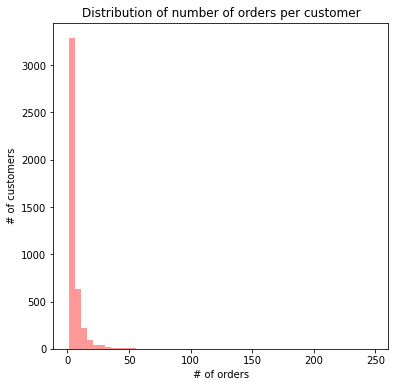

In [263]:

ax = sns.distplot(n_orders, kde=False, hist=True,color='red')
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

Бывают нечастые случаи, когда клиенты заказывали более 50 раз.


###### Когортный анализ


Набор данных, который мы используем для этого примера, не содержит дату регистрации клиента — дату, когда он зарегистрировался у продавца. Вот почему мы предполагаем, что когорта, к которой они принадлежат, основана на дате первой покупки. Возможным недостатком этого подхода является то, что набор данных не содержит прошлых данных, а то, что мы уже видим на этом снимке (между 12.01.2010 и 12.09.2011), включает повторяющихся клиентов. Другими словами, первая покупка, которую мы видим в этом наборе данных, может не быть первой покупкой данного клиента. Однако это невозможно учесть, не имея доступа ко всему историческому набору данных розничного продавца.

В качестве первого шага мы сохраняем только релевантные столбцы и удаляем повторяющиеся значения — один заказ (обозначенный InvoiceNo) может содержать несколько элементов (обозначенных StockCode).


In [264]:
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()


На втором этапе мы создаем переменные cohort   и order_month

Первый указывает месячную когорту на основе даты первой покупки (рассчитывается на одного клиента). Последний - это усеченный месяц даты покупки.


In [265]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [266]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,17850,536365,2010-12-01 08:26:00,2010-12,2010-12
7,17850,536366,2010-12-01 08:28:00,2010-12,2010-12
9,13047,536367,2010-12-01 08:34:00,2010-12,2010-12
21,13047,536368,2010-12-01 08:34:00,2010-12,2010-12
25,13047,536369,2010-12-01 08:35:00,2010-12,2010-12


Затем мы агрегируем данные по cohort и order_month и подсчитываем количество уникальных клиентов в каждой группе. Дополнительно добавляем period_number, указывающее количество периодов между месяцем когорты и месяцем покупки.


In [267]:

df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [268]:
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4


Следующим шагом является поворот df_cohort таким образом, чтобы каждая строка содержала информацию о данной когорте, а каждый столбец содержал значения за определенный период.

In [269]:

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [270]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
df_cohort.T

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
cohort,2010-12,2010-12,2010-12,2010-12,2010-12,2010-12,2010-12,2010-12,2010-12,2010-12,...,2011-09,2011-09,2011-09,2011-09,2011-10,2011-10,2011-10,2011-11,2011-11,2011-12
order_month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,...,2011-09,2011-10,2011-11,2011-12,2011-10,2011-11,2011-12,2011-11,2011-12,2011-12
n_customers,948,362,317,367,341,376,360,336,336,374,...,298,89,97,36,352,93,46,321,43,41
period_number,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,0,1,2,0,1,0


Чтобы получить матрицу удержания , нам нужно разделить значения каждой строки на первое значение строки, которое на самом деле является размером когорты — все клиенты, которые сделали свою первую покупку в данном месяце.

In [272]:

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [273]:
cohort_size

cohort
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [274]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Наконец, мы наносим матрицу удержания в виде тепловой карты. Кроме того, мы хотели включить дополнительную информацию о размере когорты. Вот почему мы фактически создали две тепловые карты, где одна, указывающая размер когорты, использует только белую цветовую карту — без окраски вообще.


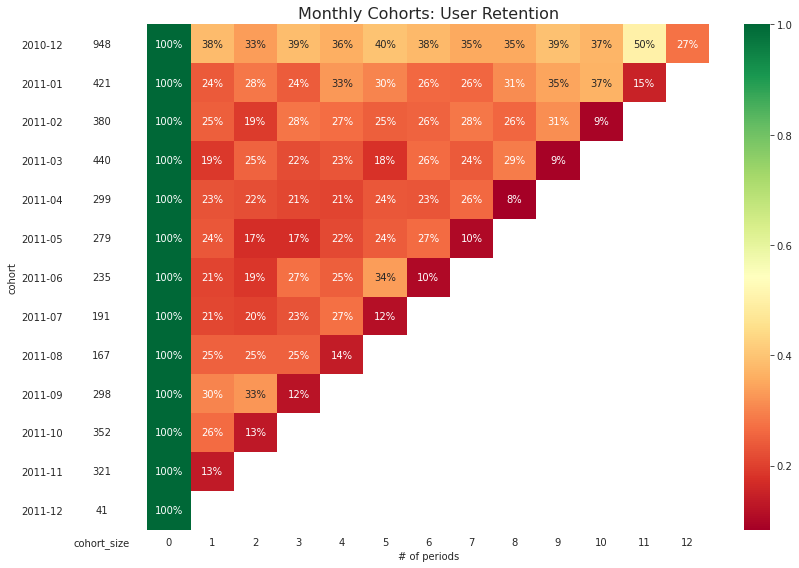

In [77]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

На изображении мы видим, что уже во втором месяце (индексирован как 1) наблюдается резкое падение, в среднем около 80% клиентов не совершают никаких покупок во второй месяц. Первая когорта (2010–2012 гг.), кажется, является исключением и работает на удивление хорошо по сравнению с другими. Через год после первой покупки удерживается 50%. Это может быть группа преданных клиентов, которые впервые присоединились к платформе на основе уже существующих связей с ритейлером. Однако, исходя только из данных, это очень трудно точно объяснить.
По всей матрице мы можем наблюдать колебания удержания с течением времени. Это может быть вызвано характеристиками бизнеса, когда клиенты совершают периодические покупки, за которыми следуют периоды бездействия.
Выводы

Мы сделали несколько упрощающих предположений, но в основном это было связано с характером набора данных. Работая над реальным сценарием для компании, мы бы лучше понимали бизнес и могли бы делать более точные и содержательные выводы из анализа.

https://habr.com/ru/company/io/blog/262025/

https://medium.com/@adrianovalexey/%D1%80%D0%B0%D0%B7-%D0%B8-%D0%BD%D0%B0%D0%B2%D1%81%D0%B5%D0%B3%D0%B4%D0%B0-%D0%BA%D0%B0%D0%BA-%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C-%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BA%D0%BE%D0%B3%D0%BE%D1%80%D1%82-%D1%81-python-%D0%B8-pandas-74f2c38dd3f7

А заданий не будет. That's all for now // DV

но есть предложение

вторая часть вашего второго ДЗ превращается в в ваш проект на защиту.

на следующем занятии я сделаю для вас матрицу требований, а сейчас предлагаю обсудить саму концепцию

In [ ]:
Оптимизация
Json
Ансамбли
Python SQL
Визуализации
Оптимизация
BI*
Качество модели
Переобучение*